In [1]:
import librosa as lb
import librosa.display
import matplotlib.pyplot as plt
import os
import re
import pandas as pd
import numpy as np

from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import label_binarize


# Cargar datos y normalizar

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
usr_folder = r'/content/drive/MyDrive/Big Data/Datamining/Practica/2025_Datasets_Datamining' # Albert

In [4]:
usr_folder = r'/content/drive/MyDrive/Master/Data Mining/Prácticas Data Mining/2025_Datasets_Datamining' # Wenjie#

In [5]:
output_folder = usr_folder +  '/dataset_lite/Output'

In [6]:
df = pd.read_csv(output_folder + "/features_upsampling.csv")
df.tail()

,zcr_1,zcr_2,zcr_3,zcr_4,zcr_5,zcr_6,zcr_7,zcr_8,zcr_9,zcr_10,...,delta2_mfcc_13_165,delta2_mfcc_13_166,delta2_mfcc_13_167,delta2_mfcc_13_168,delta2_mfcc_13_169,delta2_mfcc_13_170,delta2_mfcc_13_171,delta2_mfcc_13_172,delta2_mfcc_13_173,ship
4347,0.007044,0.013484,0.015041,0.013324,0.020044,0.019173,0.026135,0.028262,0.029992,0.032342,...,-0.081803,-0.367965,-0.395403,-0.326765,0.138960,0.390437,0.469228,0.406062,0.146983,Tug
4348,0.130323,0.211049,0.287656,0.293977,0.280268,0.238891,0.187044,0.131666,0.088767,0.055389,...,-0.443518,-0.392126,0.044809,0.478780,0.768694,0.594729,0.066847,-0.336104,-0.464424,Tug
4349,0.000488,0.000554,0.000753,0.000331,0.000331,0.000264,0.000132,0.000264,0.000397,0.000463,...,0.505860,0.273407,-0.059955,0.213428,0.517738,0.297803,0.218956,0.240117,-0.059945,Tug
4350,0.012884,0.020781,0.029078,0.028389,0.029189,0.027290,0.027590,0.029889,0.031454,0.046836,...,0.744246,0.734697,0.151671,0.096206,-0.104409,-0.237571,-0.149374,0.137438,0.143293,Tug
4351,0.051367,0.084218,0.114570,0.127825,0.132565,0.139569,0.150019,0.160084,0.159530,0.155813,...,-0.224293,-0.255093,-0.131576,0.140877,0.525694,0.670380,0.624501,-0.015984,-0.437976,Tug


In [7]:
df.describe()

,zcr_1,zcr_2,zcr_3,zcr_4,zcr_5,zcr_6,zcr_7,zcr_8,zcr_9,zcr_10,...,delta2_mfcc_13_164,delta2_mfcc_13_165,delta2_mfcc_13_166,delta2_mfcc_13_167,delta2_mfcc_13_168,delta2_mfcc_13_169,delta2_mfcc_13_170,delta2_mfcc_13_171,delta2_mfcc_13_172,delta2_mfcc_13_173
count,4352.000000,4352.000000,4352.000000,4352.000000,4352.000000,4352.000000,4352.000000,4352.000000,4352.000000,4352.000000,...,4352.000000,4352.000000,4352.000000,4352.000000,4352.000000,4352.000000,4352.000000,4352.000000,4352.000000,4352.000000
mean,0.034204,0.051166,0.067728,0.067169,0.066615,0.066166,0.066010,0.065786,0.065583,0.065438,...,0.003020,-0.024329,-0.038066,-0.022284,0.017382,0.071763,0.089628,0.065993,0.013259,-0.037169
std,0.026681,0.039283,0.051218,0.050971,0.050829,0.050509,0.050619,0.050514,0.050774,0.050902,...,0.412328,0.413628,0.413741,0.414611,0.410805,0.437210,0.445496,0.377133,0.297831,0.279920
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,-1.802454,-1.977077,-1.653892,-1.958815,-1.624597,-1.843906,-1.957835,-1.547092,-1.364251,-0.952828
25%,0.012405,0.019242,0.026367,0.025657,0.024564,0.024414,0.024849,0.024301,0.023600,0.023481,...,-0.260465,-0.284551,-0.301299,-0.286401,-0.249886,-0.226047,-0.207645,-0.181721,-0.179772,-0.222184
50%,0.029785,0.044043,0.059408,0.058935,0.058105,0.058105,0.057129,0.057617,0.057129,0.056641,...,0.009181,-0.021814,-0.033800,-0.022512,0.019490,0.078880,0.093974,0.079395,0.017559,-0.038428
75%,0.051297,0.076660,0.101561,0.100795,0.100098,0.098255,0.098633,0.098633,0.098139,0.098142,...,0.276520,0.246868,0.229995,0.241523,0.293585,0.361738,0.390449,0.317640,0.210980,0.143602
max,0.154785,0.232422,0.319336,0.329102,0.328125,0.333984,0.307617,0.310547,0.304688,0.306641,...,1.708039,1.650125,1.806314,1.772667,1.461819,1.924856,2.003659,1.597216,1.120226,1.347450


In [8]:
## Normalizar los datos con RobustScaler
# Seleccionar solo las columnas numéricas
numerical_cols = df.select_dtypes(include=['number']).columns

# Inicializar y aplicar normalización con la misma escala
scaler = StandardScaler()
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

In [9]:
df.tail()

,zcr_1,zcr_2,zcr_3,zcr_4,zcr_5,zcr_6,zcr_7,zcr_8,zcr_9,zcr_10,...,delta2_mfcc_13_165,delta2_mfcc_13_166,delta2_mfcc_13_167,delta2_mfcc_13_168,delta2_mfcc_13_169,delta2_mfcc_13_170,delta2_mfcc_13_171,delta2_mfcc_13_172,delta2_mfcc_13_173,ship
4347,-1.018049,-0.959351,-1.028803,-1.056506,-0.916347,-0.930486,-0.787852,-0.742924,-0.701038,-0.650272,...,-0.138966,-0.797447,-0.900029,-0.837832,0.153712,0.675301,1.069333,1.319028,0.657950,Tug
4348,3.602960,4.070491,4.294469,4.450277,4.203863,3.420069,2.391356,1.304349,0.456670,-0.197444,...,-1.013561,-0.855850,0.161842,1.123285,1.594228,1.133927,0.002266,-1.173160,-1.526522,Tug
4349,-1.263796,-1.288528,-1.307803,-1.311459,-1.304228,-1.304894,-1.301601,-1.297227,-1.283995,-1.276628,...,1.281951,0.752906,-0.090868,0.477280,1.020166,0.467341,0.405641,0.761787,-0.081375,Tug
4350,-0.799166,-0.773583,-0.754712,-0.760907,-0.736403,-0.769775,-0.759102,-0.710705,-0.672252,-0.365477,...,1.858346,1.867957,0.419612,0.191899,-0.402992,-0.734544,-0.571129,0.416991,0.644764,Tug
4351,0.643343,0.841491,0.914671,1.190155,1.297633,1.453433,1.659830,1.866974,1.850530,1.775699,...,-0.483494,-0.524607,-0.263631,0.300652,1.038365,1.303758,1.481100,-0.098198,-1.432027,Tug


In [10]:
df.describe()

,zcr_1,zcr_2,zcr_3,zcr_4,zcr_5,zcr_6,zcr_7,zcr_8,zcr_9,zcr_10,...,delta2_mfcc_13_164,delta2_mfcc_13_165,delta2_mfcc_13_166,delta2_mfcc_13_167,delta2_mfcc_13_168,delta2_mfcc_13_169,delta2_mfcc_13_170,delta2_mfcc_13_171,delta2_mfcc_13_172,delta2_mfcc_13_173
count,4.352000e+03,4.352000e+03,4.352000e+03,4.352000e+03,4.352000e+03,4.352000e+03,4.352000e+03,4.352000e+03,4.352000e+03,4.352000e+03,...,4.352000e+03,4.352000e+03,4.352000e+03,4.352000e+03,4.352000e+03,4.352000e+03,4352.000000,4.352000e+03,4.352000e+03,4.352000e+03
mean,1.044916e-16,-2.612289e-17,-7.183796e-17,-7.836868e-17,-5.877651e-17,1.632681e-16,6.530724e-17,1.959217e-17,1.893910e-16,-7.183796e-17,...,-1.877583e-17,-6.530724e-18,2.285753e-17,-1.959217e-17,-2.000034e-17,1.959217e-17,0.000000,6.530724e-18,6.530724e-18,-1.959217e-17
std,1.000115e+00,1.000115e+00,1.000115e+00,1.000115e+00,1.000115e+00,1.000115e+00,1.000115e+00,1.000115e+00,1.000115e+00,1.000115e+00,...,1.000115e+00,1.000115e+00,1.000115e+00,1.000115e+00,1.000115e+00,1.000115e+00,1.000115,1.000115e+00,1.000115e+00,1.000115e+00
min,-1.282099e+00,-1.302643e+00,-1.322502e+00,-1.317945e+00,-1.310733e+00,-1.310130e+00,-1.304213e+00,-1.302463e+00,-1.291808e+00,-1.285720e+00,...,-4.379236e+00,-4.721571e+00,-3.905850e+00,-4.671255e+00,-3.997434e+00,-4.382084e+00,-4.596448,-4.277717e+00,-4.625670e+00,-3.271518e+00
25%,-8.171242e-01,-8.127539e-01,-8.076371e-01,-8.145204e-01,-8.274028e-01,-8.267162e-01,-8.132553e-01,-8.213361e-01,-8.269560e-01,-8.243608e-01,...,-6.390909e-01,-6.291931e-01,-6.362988e-01,-6.370951e-01,-6.506696e-01,-6.812382e-01,-0.667362,-6.569089e-01,-6.481964e-01,-6.610326e-01
50%,-1.656271e-01,-1.813531e-01,-1.624593e-01,-1.615663e-01,-1.674392e-01,-1.596052e-01,-1.754717e-01,-1.617217e-01,-1.665147e-01,-1.728439e-01,...,1.494416e-02,6.081330e-03,1.031161e-02,-5.484678e-04,5.132162e-03,1.628074e-02,0.009758,3.554154e-02,1.444040e-02,-4.496387e-03
75%,6.407164e-01,6.490641e-01,6.606580e-01,6.597857e-01,6.588064e-01,6.353773e-01,6.445544e-01,6.503311e-01,6.412778e-01,6.425848e-01,...,6.633855e-01,6.557318e-01,6.479688e-01,6.363498e-01,6.724233e-01,6.633167e-01,0.675328,6.673385e-01,6.639465e-01,6.458696e-01
max,4.519893e+00,4.614634e+00,4.913080e+00,5.139474e+00,5.145512e+00,5.302970e+00,4.773627e+00,4.845937e+00,4.709758e+00,4.739162e+00,...,4.135582e+00,4.048683e+00,4.458320e+00,4.329742e+00,3.516515e+00,4.238942e+00,4.296899,4.060629e+00,3.717187e+00,4.947047e+00


# Separar los datos

In [11]:
df.tail(1)

,zcr_1,zcr_2,zcr_3,zcr_4,zcr_5,zcr_6,zcr_7,zcr_8,zcr_9,zcr_10,...,delta2_mfcc_13_165,delta2_mfcc_13_166,delta2_mfcc_13_167,delta2_mfcc_13_168,delta2_mfcc_13_169,delta2_mfcc_13_170,delta2_mfcc_13_171,delta2_mfcc_13_172,delta2_mfcc_13_173,ship
4351,0.643343,0.841491,0.914671,1.190155,1.297633,1.453433,1.65983,1.866974,1.85053,1.775699,...,-0.483494,-0.524607,-0.263631,0.300652,1.038365,1.303758,1.4811,-0.098198,-1.432027,Tug


In [12]:
## Separación el dataframe según las características "X" y el target "y".
X = df.drop(columns=["ship"]) # Se quita el target y las caracerísticas que no se tienen que analizar

# Convertir los datos de X de string a float


# El target es adivinar el barco.
y = df["ship"]

# Codificar etiquetas categóricas a enteros
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)  # Convierte ["barco1", "barco2", ...] a [0,1,2,3]

# División estratificada para mantener la proporción de clases en train y test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=23, stratify=y)

# Verificar la proporción de clases en train y test
print("Proporción en train:")
print(np.bincount(y_train) / len(y_train))
print("Total ejemplos en train:", len(y_train))

print("Proporción en test:")
print(np.bincount(y_test) / len(y_test))
print("Total ejemplos en test:", len(y_test))

Proporción en train:
[0.25016415 0.25016415 0.24983585 0.24983585]
Total ejemplos en train: 3046
Proporción en test:
[0.24961715 0.24961715 0.25038285 0.25038285]
Total ejemplos en test: 1306


# Entrenamiento

In [13]:
import torch
import torchvision
import torchvision.transforms as transforms
import torch.nn as nn
from torch.utils.data import DataLoader, TensorDataset


In [14]:
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')

print(device)

cuda:0


In [15]:
# Reestructurar X para CNN (num_samples, 44, 173)
X_train = X_train.to_numpy().reshape(len(X_train), 44, 173)
X_test = X_test.to_numpy().reshape(len(X_test), 44, 173)

# Convertir a tensores de PyTorch
X_train = torch.tensor(X_train, dtype=torch.float32)
X_test = torch.tensor(X_test, dtype=torch.float32)
y_train = torch.tensor(y_train, dtype=torch.long)
y_test = torch.tensor(y_test, dtype=torch.long)

# Crear DataLoaders
batch_size = 32
train_dataset = TensorDataset(X_train, y_train) # Genera un dataset de train con labal [0...4]
test_dataset = TensorDataset(X_test, y_test) # Genera un dataset de test con labal [0...4]
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

#CNN

In [16]:
import torch
import torch.nn as nn
import torch.optim as optim

# Parámetros del dataset
n_features = 44   # 1 ZCR, 1 RMS, 3 SPECTRAL, 13 MFCC, , 13 DETLAS1 DE MFCC y 13 delta2 de MFCC
time_steps = 173  # Número de frames temporales por feature
num_classes = 4  # Cambia según tus clases de animales

# Definir la CNN 1D
class AudioCNN(nn.Module):
    def __init__(self, n_features, num_classes):
        super(AudioCNN, self).__init__()

        # Capas convolucionales
        self.conv1 = nn.Conv1d(in_channels=n_features, out_channels=128, kernel_size=3, padding=1)
        self.bn1 = nn.BatchNorm1d(128)
        self.conv2 = nn.Conv1d(in_channels=128, out_channels=256, kernel_size=3, padding=1)
        self.bn2 = nn.BatchNorm1d(256)
        self.conv3 = nn.Conv1d(in_channels=256, out_channels=512, kernel_size=3, padding=1)
        self.bn3 = nn.BatchNorm1d(512)

        # Global Average Pooling
        self.global_avg_pool = nn.AdaptiveAvgPool1d(1)

        # Capas fully connected
        self.fc1 = nn.Linear(512, 256)
        self.dropout1 = nn.Dropout(0.5)
        self.fc2 = nn.Linear(256, 128)
        self.dropout2 = nn.Dropout(0.5)
        self.fc3 = nn.Linear(128, num_classes)

        # Funciones de activación
        self.relu = nn.ReLU(0.1)

    def forward(self, x):
        # Capas convolucionales
        x = self.relu(self.bn1(self.conv1(x)))  # (batch, 128, 173)
        x = self.relu(self.bn2(self.conv2(x)))  # (batch, 256, 173)
        x = self.relu(self.bn3(self.conv3(x)))  # (batch, 512, 173)

        # Global Average Pooling
        x = self.global_avg_pool(x)  # (batch, 512, 1)
        x = torch.flatten(x, start_dim=1)  # (batch, 512)

        # Capas fully connected
        x = self.relu(self.fc1(x))
        x = self.dropout1(x)
        x = self.relu(self.fc2(x))
        x = self.dropout2(x)
        x = self.fc3(x)

        return x


# Crear modelo
model = AudioCNN(n_features=44, num_classes=num_classes).to(device)

# Definir optimizador y función de pérdida
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Resumen del modelo
print(model)

AudioCNN(
  (conv1): Conv1d(44, 128, kernel_size=(3,), stride=(1,), padding=(1,))
  (bn1): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv2): Conv1d(128, 256, kernel_size=(3,), stride=(1,), padding=(1,))
  (bn2): BatchNorm1d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv3): Conv1d(256, 512, kernel_size=(3,), stride=(1,), padding=(1,))
  (bn3): BatchNorm1d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (global_avg_pool): AdaptiveAvgPool1d(output_size=1)
  (fc1): Linear(in_features=512, out_features=256, bias=True)
  (dropout1): Dropout(p=0.5, inplace=False)
  (fc2): Linear(in_features=256, out_features=128, bias=True)
  (dropout2): Dropout(p=0.5, inplace=False)
  (fc3): Linear(in_features=128, out_features=4, bias=True)
  (relu): ReLU(inplace=True)
)


In [17]:
import torch.optim as optim

#Definimos la función de pérdida y el optimizador
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.001, momentum=0.9)
iteraciones = 10

In [18]:
num_epochs = 100
for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    for inputs, labels in train_loader:
        inputs, labels = inputs.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

    print(f"Epoch {epoch+1}/{num_epochs}, Loss: {running_loss/len(train_loader):.4f}")

Epoch 1/100, Loss: 1.3629
Epoch 2/100, Loss: 1.2804
Epoch 3/100, Loss: 1.1807
Epoch 4/100, Loss: 1.1005
Epoch 5/100, Loss: 1.0344
Epoch 6/100, Loss: 0.9738
Epoch 7/100, Loss: 0.9363
Epoch 8/100, Loss: 0.8860
Epoch 9/100, Loss: 0.8459
Epoch 10/100, Loss: 0.8345
Epoch 11/100, Loss: 0.7883
Epoch 12/100, Loss: 0.7601
Epoch 13/100, Loss: 0.7438
Epoch 14/100, Loss: 0.7192
Epoch 15/100, Loss: 0.7085
Epoch 16/100, Loss: 0.6884
Epoch 17/100, Loss: 0.6694
Epoch 18/100, Loss: 0.6445
Epoch 19/100, Loss: 0.6168
Epoch 20/100, Loss: 0.6071
Epoch 21/100, Loss: 0.5948
Epoch 22/100, Loss: 0.5928
Epoch 23/100, Loss: 0.5480
Epoch 24/100, Loss: 0.5234
Epoch 25/100, Loss: 0.5268
Epoch 26/100, Loss: 0.5008
Epoch 27/100, Loss: 0.5013
Epoch 28/100, Loss: 0.4934
Epoch 29/100, Loss: 0.4727
Epoch 30/100, Loss: 0.4577
Epoch 31/100, Loss: 0.4611
Epoch 32/100, Loss: 0.4234
Epoch 33/100, Loss: 0.4214
Epoch 34/100, Loss: 0.4209
Epoch 35/100, Loss: 0.4146
Epoch 36/100, Loss: 0.3942
Epoch 37/100, Loss: 0.3883
Epoch 38/1

# Resultados

In [19]:
model.eval()
y_true = []
y_pred = []
y_scores = []

with torch.no_grad():
    for inputs, labels in test_loader:
        inputs, labels = inputs.to(device), labels.to(device)
        outputs = model(inputs)

        _, predicted = torch.max(outputs, 1)  # Predicción final
        y_true.extend(labels.cpu().numpy())
        y_pred.extend(predicted.cpu().numpy())

        y_scores.extend(torch.softmax(outputs, dim=1).cpu().numpy())  # Probabilidades

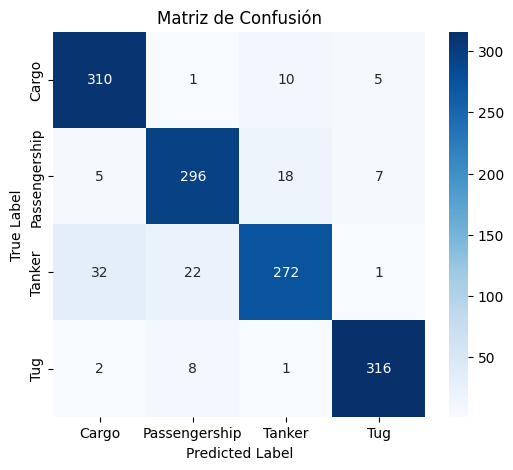

In [33]:
import seaborn as sns

conf_matrix = confusion_matrix(y_true, y_pred)

plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap="Blues", xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Matriz de Confusión')
plt.show()

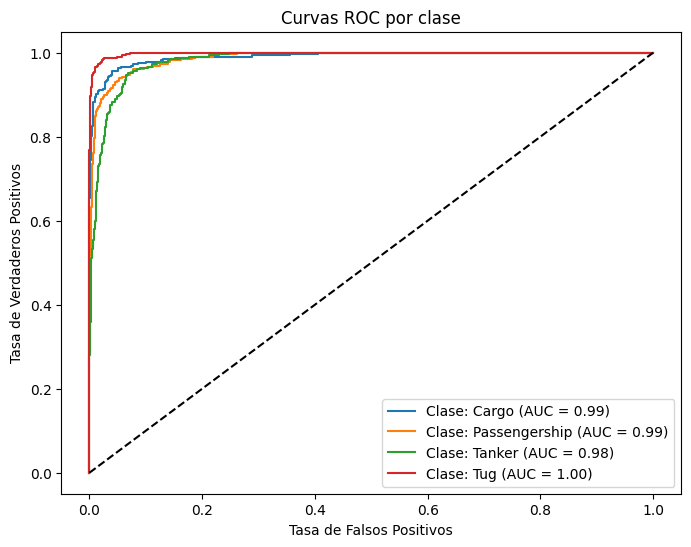

In [26]:
y_true_bin = label_binarize(y_true, classes=[0, 1, 2, 3])  # Para 4 clases

plt.figure(figsize=(8, 6))

for i, label in enumerate(label_encoder.classes_):
    fpr, tpr, _ = roc_curve(y_true_bin[:, i], np.array(y_scores)[:, i])  # FPR, TPR
    auc_score = roc_auc_score(y_true_bin[:, i], np.array(y_scores)[:, i])  # AUC

    plt.plot(fpr, tpr, label=f'Clase: {label} (AUC = {auc_score:.2f})')  # Etiqueta


plt.plot([0, 1], [0, 1], 'k--')  # Línea de referencia
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curvas ROC por clase')
plt.legend(loc='lower right')
plt.show()

In [36]:
print("Reporte de clasificación:\n", classification_report(y_true, y_pred, target_names=label_encoder.classes_))

Reporte de clasificación:
                precision    recall  f1-score   support

        Cargo       0.89      0.95      0.92       326
Passengership       0.91      0.91      0.91       326
       Tanker       0.90      0.83      0.87       327
          Tug       0.96      0.97      0.96       327

     accuracy                           0.91      1306
    macro avg       0.91      0.91      0.91      1306
 weighted avg       0.91      0.91      0.91      1306



# Save model


In [37]:
model_folder = usr_folder +  '/dataset_lite/Modelos'
torch.save(model.state_dict(), model_folder + '/model_cnn_diseño2.pth')